In [307]:
import random
from collections import Counter
import numpy
import pandas as pd

class Card(dict):
    def __init__(self, suit, value):
        self['suit'] = suit
        self['value'] = value
        self.suit = suit
        self.value = value
        
        
class Deck:
    def __init__(self):
        suits = "SHDC"
        values = ['01','02','03','04','05','06','07','08','09','10','11','12','13']
        self.cards = []
        for suit in suits:
            for value in values:
                self.cards.append(Card(suit, value))

    def shuffle(self):
        random.shuffle(self.cards)
    
    def cut(self):
        n = int(random.triangular(1,51))
        self.cards = self.cards[n:] + self.cards[:n]
    
    def deal(self, n):
        cards = self.cards[:n]
        self.cards = self.cards[n:]
        return cards

class Hand:
    def __init__(self):
        self.cards = []
        self.community = []
        self.multiples = {}
        self.flush = False
        self.straight = False
        self.straight_flush = False
        self.royal_flush = False
        self.full_house = False
        self.pair = False
        self.two_pair = False
        self.three = False
        self.four = False
        self.deck = None
        self.best = None
        
    def add_cards(self, cards=None, deck=None, shuffle=True, cut=True, n=1):
        if deck is None:
            self.cards = self.cards + cards
        else:
            if shuffle:
                deck.shuffle()
            if cut:
                deck.cut()
            self.cards = self.cards + deck.deal(n)
    
    def update_community(self, community):
        if community:
            self.community = community
            self.cards = list(set(self.cards.append(community)))
        
    def evaluate(self):
        def set_multiples(self):
            val_counts = Counter([card.value for card in self.cards])
            for key, value in val_counts.items():
                if value in self.multiples.keys():
                    self.multiples[value].append(key)
                else:
                    self.multiples[value] = [key]
            if 2 in self.multiples.keys():
                self.pair = True
                if len(self.multiples[2]) > 1:
                    self.two_pair = True
            if 3 in self.multiples.keys():
                self.three = True
            if 4 in self.multiples.keys():
                self.four = True
            

        def set_flush(self):
            suit_counts = Counter([card.suit for card in self.cards])
            if max(suit_counts.values()) >= 5:
                self.flush = True

        def set_straight(self):
            values = list(set([card.value for card in self.cards]))
            values = sorted(values)
            s = ''.join(values)
            straight_string = '0102030405060708091011121301'
            substr = compareTwoStrings(s, straight_string)
            if len(substr) >= 10:
                self.straight = True

        def set_full_house(self):
            if 3 in self.multiples.keys():
                if 2 in self.multiples.keys():
                    self.full_house = True
                if len(self.multiples[3]) > 1:
                    self.full_house = True
            elif 4 in self.multiples.keys():
                if 2 in self.multiples.keys():
                    self.full_house = True
                if 3 in self.multiples.keys():
                    self.full_house = True
            else:
                self.full_house = False

        def set_straight_flush(self):
            if self.straight:
                if self.flush:
                    suit_counts = Counter([card.suit for card in self.cards])
                    flush_suit = [k for k,v in suit_counts.items() if v >= 5][0]
                    flush_cards = [card.value for card in self.cards if card.suit == flush_suit]
                    flush_cards = sorted(flush_cards)
                    if '01' in flush_cards:
                        flush_cards = flush_cards + ['01']
                    s = ''.join(flush_cards)
                    straight_string = '0102030405060708091011121301'
                    substr = compareTwoStrings(s, straight_string)
                    if substr == '1011121301':
                        self.royal_flush = True
                    else:
                        if len(substr) >= 10:
                            self.straight_flush = True
        

        set_multiples(self)
        set_flush(self)
        set_straight(self)
        set_straight_flush(self)
        set_full_house(self)
        if self.royal_flush:
            self.best = '01:royal flush'
        elif self.straight_flush:
            self.best = '02:straight flush'
        elif self.four:
            self.best = '03:four of a kind'
        elif self.full_house:
            self.best = '04:full house'
        elif self.flush:
            self.best = '05:flush'
        elif self.straight:
            self.best = '06:straight'
        elif self.three:
            self.best = '07:three of a kind'
        elif self.two_pair:
            self.best = '08:two pair'
        elif self.pair:
            self.best = '09:pair'
        else:
            self.best = '10:no pair'
        

def compareTwoStrings(str1, str2):
    answer = ""
    if len(str1) == len(str2):
        if str1==str2:
            return str1
        else:
            longer=str1
            shorter=str2
    elif (len(str1) == 0 or len(str2) == 0):
        return ""
    elif len(str1)>len(str2):
        longer=str1
        shorter=str2
    else:
        longer=str2
        shorter=str1
    matrix = numpy.zeros((len(shorter), len(longer)))
    for i in range(len(shorter)):
        for j in range(len(longer)):               
            if shorter[i]== longer[j]:
                matrix[i][j]=1
    longest=0
    start=[-1,-1]
    end=[-1,-1]    
    for i in range(len(shorter)-1, -1, -1):
        for j in range(len(longer)):
            count=0
            begin = [i,j]
            while matrix[i][j]==1:
                finish=[i,j]
                count=count+1 
                if j==len(longer)-1 or i==len(shorter)-1:
                    break
                else:
                    j=j+1
                    i=i+1
            i = i-count
            if count>longest:
                longest=count
                start=begin
                end=finish
                break
    answer=shorter[int(start[0]): int(end[0])+1]
    return answer

In [308]:

hands = []
for i in range(20000):
    d = Deck()
    h = Hand()
    h.add_cards(deck=d,n=7)
    h.evaluate()
    hands.append({'flush':h.flush,
                  'straight':h.straight,
                  'straight_flush':h.straight_flush,
                  'royal_flush':h.royal_flush,
                  'full_house':h.full_house,
                  'pair':h.pair,
                  'two_pair':h.two_pair,
                  'three_of_a_kind':h.three,
                  'four_of_a_kind':h.four,
                  'best':h.best,
                  'cards':h.cards
                 })

df = pd.DataFrame(hands)
df['best'].value_counts()/float(len(df))
#df.astype(float).describe().ix['mean'].sort(inplace=False)

09:pair               0.43990
08:two pair           0.23480
10:no pair            0.17560
07:three of a kind    0.05060
06:straight           0.04180
05:flush              0.03100
04:full house         0.02455
03:four of a kind     0.00150
02:straight flush     0.00025
Name: best, dtype: float64

In [ ]:
print([row for row in df[df['best'] == 'straightflush']['cards']])

In [312]:
h = Hand()
h.add_cards([Card('S','02'),Card('H','02'),Card('D','03'),Card('S','03'),Card('S','04'), Card('S','05'),Card('S','06')])
h.evaluate()
h.best

'02:straight flush'

In [198]:
d = Deck()
d.shuffle()

In [203]:
h = Hand(d)
h.add_cards(d,7)
h.cards

[{'suit': 'H', 'value': '02'},
 {'suit': 'S', 'value': '11'},
 {'suit': 'C', 'value': '01'},
 {'suit': 'H', 'value': '05'},
 {'suit': 'S', 'value': '09'},
 {'suit': 'C', 'value': '07'},
 {'suit': 'H', 'value': '09'}]

In [205]:
h.evaluate()

In [153]:
h.set_multiples()

In [154]:
h.multiples

{2: '02', 4: '03'}

In [155]:
h.multiples

{2: '02', 4: '03'}

In [159]:
h.set_full_house()
h.full_house

False

In [160]:
h.set_flush()
h.flush

True

In [131]:
l = list(set([card.value for card in h.cards]))
l = sorted(l)

In [161]:
h.set_straight()
h.straight

True

In [163]:
h.set_straight_flush()
h.straight_flush

True

In [123]:


compareTwoStrings(s, straight_string)

'0203040506'

In [103]:
h.cards

[{'suit': 'C', 'value': '02'},
 {'suit': 'H', 'value': '02'},
 {'suit': 'C', 'value': '03'},
 {'suit': 'S', 'value': '04'},
 {'suit': 'D', 'value': '05'},
 {'suit': 'H', 'value': '06'}]

(array([  2037.,   6010.,  10050.,  13837.,  17925.,  17963.,  14033.,
         10154.,   5974.,   2017.]),
 array([  1. ,   5.9,  10.8,  15.7,  20.6,  25.5,  30.4,  35.3,  40.2,
         45.1,  50. ]),
 <a list of 10 Patch objects>)

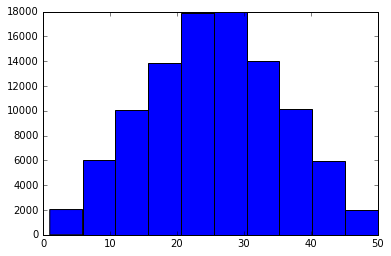

In [31]:
nums = []
for n in range(100000):
    nums.append(int(random.triangular(1,51)))
    

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(nums)